In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import operator

from Host.SpectrumMaker.SpectrumMaker import Spectrum
from Host.Common.CustomConfigObj import CustomConfigObj

def findVariables(variables,env={}):
    # Find entries in the variables dictionary which have values that evaluate to sequences
    #  and those which evaluate to constants. The result is the pair constants, sequences
    #  where constants is a list with (name,value) pairs and sequences is a list of
    #  (name,sequence) pairs, where name is the name of the variable and sequence is a
    #  tuple of values that the variable must assume
    constants, sequences = [], []
    for k in variables:
        v = variables[k]
        e = eval(v,env)
        if operator.isSequenceType(e):
            sequences.append((k,e))
        else:
            constants.append((k,e))
    return constants, sequences

if __name__ == "__main__":
    env = {}
    config = CustomConfigObj("CFADS_Spectra.ini")
    if "CODE" in config:
        code = compile(config["CODE"]["code"], "CODE", "exec")
        exec code in env
    if "VARIABLES" in config:
        constants, sequences = findVariables(config["VARIABLES"], env)
    
    spectrum1 = Spectrum("CO2", config["SPECTRUM_1"], ".", env)
    spectrum1.setupModel(dict(constants))
    spectrum2 = Spectrum("CH4", config["SPECTRUM_2"], ".", env)
    spectrum2.setupModel(dict(constants))
    spectrum3 = Spectrum("H2O", config["SPECTRUM_3"], ".", env)
    spectrum3.setupModel(dict(constants))        

<IPython.core.display.Javascript object>


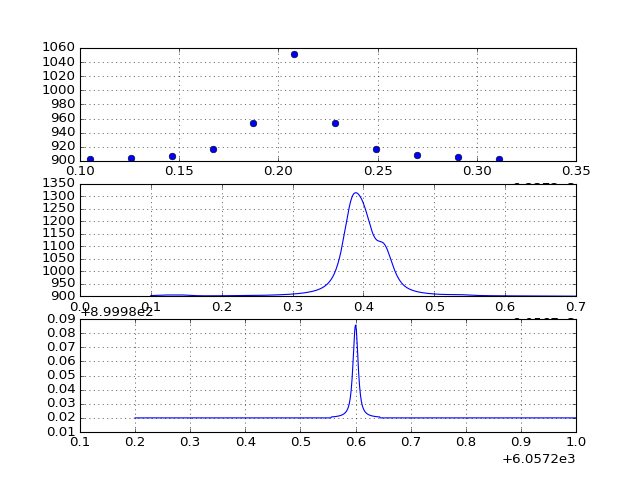

6237.408
6057.1
6057.8


In [23]:
plt.figure()
env["temperature"] = 273.15+45
env["pressure"] = 140
spectrum1.updateModel(env)
wavenumber1 = 6237.408 + np.arange(-5, 6)*0.0206
loss1 = spectrum1.model(wavenumber1)
wavenumber2 = np.linspace(6056.8, 6057.4, 1001)
loss2 = spectrum2.model(wavenumber2)
wavenumber3 = np.linspace(6057.4, 6058.2, 1001)
loss3 = spectrum3.model(wavenumber3)
plt.subplot(3,1,1)
plt.plot(wavenumber1, loss1,'o')
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(wavenumber2, loss2)
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(wavenumber3, loss3)
plt.grid(True)
print spectrum1.centerFrequency
print spectrum2.centerFrequency
print spectrum3.centerFrequency

<IPython.core.display.Javascript object>


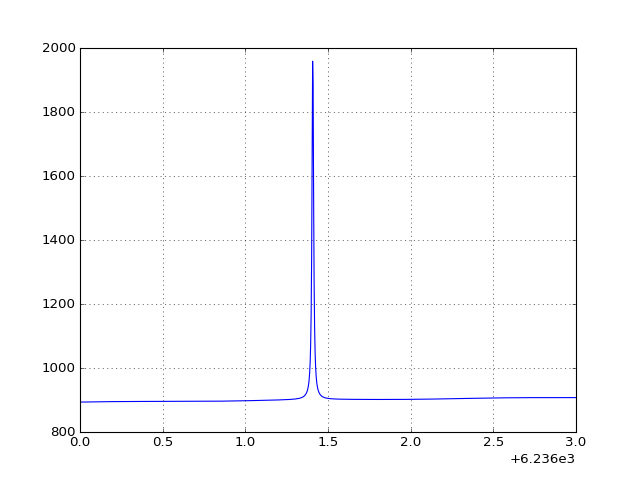

In [3]:
env["pressure"] = 140
spectrum1.updateModel(env)
loss1 = spectrum1.model(wavenumber1)
plt.figure()
plt.plot(wavenumber1, loss1)
plt.grid(True)

<IPython.core.display.Javascript object>


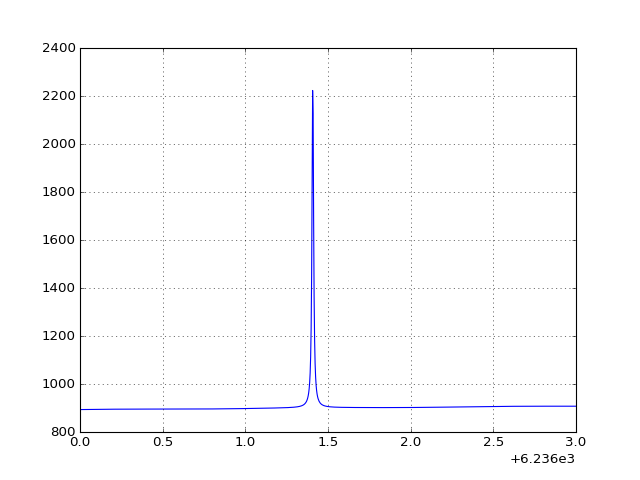

In [4]:
env["pressure"] = 140
spectrum1.updateModel(env)
spectrum1.model[14,"strength"] = 5000
loss1 = spectrum1.model(wavenumber1)
plt.figure()
plt.plot(wavenumber1, loss1)
plt.grid(True)

[0.0, 0.0, 0.01, 0.0, 6057.1000000000004, 1.0, 13.0]


<IPython.core.display.Javascript object>


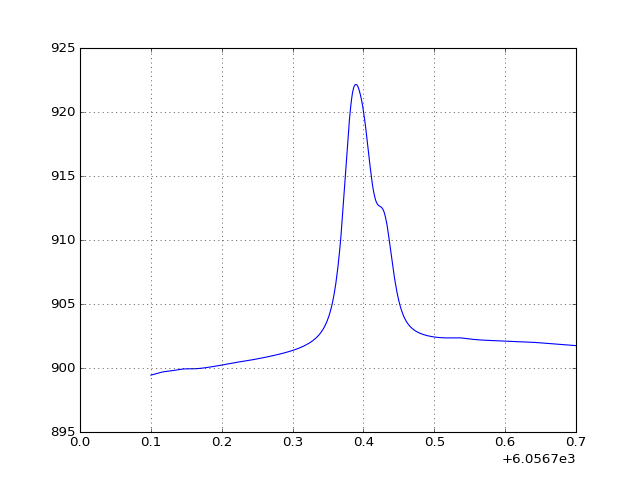

In [5]:
env["pressure"] = 140
spectrum2.updateModel(env)
print [spectrum2.model[1002,i] for i in range(7)] 
loss2 = spectrum2.model(wavenumber2)
plt.figure()
plt.plot(wavenumber2, loss2)
plt.grid(True)